# Report 1 

#### By Clay Harper, Skyler Tran, Taylor Slaton

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

# Business Understanding

<p>The Genetic Variant Classifications dataset is a dataset that contains information on whether labs have classified different genetic variants in different ways. Variants are classified by clinical laboratories on whether a variant is considered benign, likely benign, uncertain, likely pathogenic, or pathogenic. This is how these classifications come to be, but it is possible that different labs will classify variants differently. When the difference is between benign and likely benign or pathogenic and likely pathogenic, the difference isn't that significant. However, when the differences are between benign or pathogenic the issue is much larger. This dataset takes this data and compiles whether or not these clinical labs have identified these variants differently. This is a problem that causes clinicians and researches to not necessarily know how to give a patient advice or how to continue with the found variant. This can cause a mix of false positives and significantly more problematic false negatives. <br> 
Our plan for this data set is to find a way to show people if their genetic variant falls within this gray area to be able seek a second opinion to keep themselves safe. This will hopefully accomplish two things: </p>
<ol>
<li>The ability to know whether or not a second opinion should be sought out for the person's safety and health</li>
<li>The ability to know whether or not a second opinion should be sought out for the person's insurance and doctor visit costs</li>
</ol>
<p>Before discussing what is important to be able to accomplish both of these goals, we must define specificity and sensitivity in a medical context. Sensitivity is how often a true positive is generated. A test that has a sensitivity of 80% correctly identifies 80% of people who have a disease as having a disease and 20% of people who have a disease as not having a disease. This is a false-negative. Specificity is how often a true negative is generated. A test that has a specificity of 92% correctly identifies 92% of people who do not have a disease as not having a disease and 8% of people who do not have a disease as having a disease (Citation 1). For goal one, we want to maximize the sensitivity of our system. For goal two we want to maximize the specificity of our system. 
Both false-negative and false-positives can cause issues for a patient. A false-negative could "...give false reassurance to the patient" and a false-positive could send people "...on needless and expensive medical odysseys" (Citation 2). 
The rate of sensitivity and specificity needs to perform is dependent on the test. Most medical tests attempt a high sensitivity and high specificity in their testing. But what does "high" mean in these situations? <br>
In the medical field, "high" means different things based off what the test is. Stated in our first citation, "Generally speaking, “a test with a sensitivity and specificity of around 90% would be considered to have good diagnostic performance—nuclear cardiac stress tests can perform at this level,” Hoffman said." This is for diagnostics, however. If we applied this same level of high to an HIV test, a 90% rate wouldn't be good, we would want a level closer to 99%.<br>
Since our system is meant to give people advice on whether or not they should seek a second opinion on a possibly pathogenic geneic variant, we would want to prioritize having a highly sensitive system over a highly specific system. Valuing the possible loss of life is more important than valuing the possible loss of money in this case.
</p>



<br><br>
<ol>
<li>https://www.healthnewsreview.org/toolkit/tips-for-understanding-studies/understanding-medical-tests-sensitivity-specificity-and-positive-predictive-value/</li>
<li>https://www.healthnewsreview.org/review/cautious-independent-voices-help-round-out-nprs-look-at-experimental-test-for-cancer/</li>
</ol>

# Data Understanding  

## About the data

| Name               | Type     | Level of<br>Measurement                                                   | Possibilities                                                                                                                                            | Explanation                                                                                                                                                                                                          | Keeping?                                                                                                                                                    |
|--------------------|----------|---------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------|
| CHROM              | object   | Ordinal*<br>* Chromosomes<br>are <br>recognized<br>in a specific<br>order | Between 1 and 22                                                                                                                                         | Chromosome the variant is located on                                                                                                                                                                                 | Yes because this<br>represents what<br>chromosome is being<br>affected which<br>leads into what<br>disease might be<br>caused                               |
| POS                | int 64   | Interval                                                                  | Between 961 and 248                                                                                                                                      | Position on the chromosome the variant<br> is located on                                                                                                                                                             | Yes because this<br>represents where the<br>chromosome is being<br>affected which<br>leads into what<br>disease might be<br>caused                          |
| REF                | object   | Nominal                                                                   | a, c, t, g                                                                                                                                               | Reference Allele                                                                                                                                                                                                     | Yes because this<br>represents the <br>normal allele                                                                                                        |
| ALT                | object   | Nominal                                                                   | a, c, t, g                                                                                                                                               | Alternate Allele                                                                                                                                                                                                     | Yes because this<br>represents the <br>variant allele                                                                                                       |
| AF_ESP             | float 64 | Interval                                                                  | Between 0 and 0.5                                                                                                                                        | Allele frequencies from GO-ESP                                                                                                                                                                                       | Yes because this<br>represents how often<br>this allele may cause<br>an affect to people                                                                    |
| AF_EXAC            | float 64 | Interval                                                                  | Between 0 and 0.5                                                                                                                                        | Allele frequencies from ExAC                                                                                                                                                                                         | Yes because this<br>represents how often<br>this allele may cause<br>an affect to people                                                                    |
| AF_TGP             | float 64 | Interval                                                                  | Between 0 and 0.5                                                                                                                                        | Allele frequencies from the 1000<br> genomes project                                                                                                                                                                 | Yes because this<br>represents how often<br>this allele may cause<br>an affect to people                                                                    |
| CLNDISDB           | object   | Nominal                                                                   | Formula:<br>  OMIM:NNNNNN                                                                                                                                | Tag-value pairs of disease database<br> name and identifier                                                                                                                                                          | Yes because this<br>identifies the <br>diseases within<br>our data                                                                                          |
| CLNDISDBINCL       | object   | Nominal                                                                   | Formula:<br>  OMIM:NNNNNN                                                                                                                                | Tag-value pairs of disease database<br> name and identifier for included <br> variant                                                                                                                                | Yes because we<br>have all the data                                                                                                                         |
| CLNDN              | object   | Nominal                                                                   | Strings representing<br> a name                                                                                                                          | ClinVar's preferred disease name<br> for the concept specified by <br> disease identifiers in CLNDISDB                                                                                                               | Yes because this<br>represents what<br>disease this<br>variant can cause                                                                                    |
| CLNDNINCL          | object   | Nominal                                                                   | null                                                                                                                                                     | ClinVar's preferred disease name<br> for the concept specified by <br> disease identifiers in CLNDISDB<br> for included variant                                                                                      | No because there<br>is not enough data                                                                                                                      |
| CLNHGVS            | object   | Nominal                                                                   | Unique values                                                                                                                                            | Top-level HGVS* expression<br>* A standard made for describing<br>  variants, mutations, or <br>  polymorphisms                                                                                                      | Yes because this<br>describes the variant<br>using an industry <br>standard                                                                                 |
| CLNSIGINCL         | object   | Nominal                                                                   | Formula<br> VariationID:clinical significance                                                                                                            | Clinical significance for a<br> haplotype* or genotype* that<br> includes this variant<br>* Group of genes within an<br>  organism inherited from<br>  a single parent<br>* An organism's genetic <br>  constitution | No because there<br>is not enough data                                                                                                                      |
| CLNVC              | object   | Nominal                                                                   | single_nucleotide_variant<br>deletion                                                                                                                    | Variant Type                                                                                                                                                                                                         | Yes because this<br>determines what <br>variant type we<br>are viewing                                                                                      |
| CLNVI              | object   | Nominal                                                                   | Formula<br> UniProtKB_(protein):LNNNNN                                                                                                                   | Variant's clinical sources reported<br> as tag-value pairs of database and <br> variant identifier                                                                                                                   | No because there are<br>no patterns in this data<br>and thus nothing to learn                                                                               |
| MC                 | object   | Nominal                                                                   | Formula<br> SO:NNNNNNN|molecular_consequence                                                                                                             | Coma separated list of molecular<br> consequences in the form of <br> Sequence Ontology*<br>* A way to define sequence features                                                                                      | No because it involves<br>heavy text processing<br>(could be used for <br>classification not<br>visualization)                                              |
| ORIGIN             | float 64 | Nominal                                                                   | unknown<br>germline<br>somatic<br>inherited<br>paternal<br>maternal<br>denovo<br>biparental<br>uniparental<br>not-tested<br>tested-inconclusive<br>other | Allele Origin                                                                                                                                                                                                        | Yes because the origin<br>of a variant can show<br>why someone might<br>have said variant and<br>if the are more susceptible<br>to the disease it causes    |
| SSR                | float 64 | Nominal                                                                   | 0 - unspecified<br>1 - Paralog<br>2 - byEST<br>4 - oldAlign<br>8 - Para_EST<br>16 - 1kg_failed<br>1024 - other                                           | Variant Suspect Reason Codes                                                                                                                                                                                         | No because there<br>is not enough data                                                                                                                      |
| CLASS              | int 64   | Nominal                                                                   | 0 - no conflict<br>1 - conflict                                                                                                                          | Binary representation of the target<br> class                                                                                                                                                                        | Yes because this<br>determines if there<br>is a classification<br>issue or not                                                                              |
| Allele             | object   | Nominal                                                                   | a, c, t, g                                                                                                                                               | Variant allele used to calculate the<br> consequence                                                                                                                                                                 | Yes because this<br>determines what<br>allele causes the<br>consequence and thus<br>what we need to explore                                                 |
| Consequences       | object   | Nominal                                                                   | 48 different values                                                                                                                                      | Type of consequence                                                                                                                                                                                                  | Yes because this<br>determines what this<br>variant causes to the<br>patient                                                                                |
| IMPACT             | object   | Ordinal                                                                   | LOW<br>MODERATE<br>MODIFIER                                                                                                                              | The impact modifier for the consequence<br> type                                                                                                                                                                     | Yes because this<br>determines how much<br>this variant affects<br>the patient                                                                              |
| SYMBOL             | object   | Nominal                                                                   | 2329 different values                                                                                                                                    | Gene Name                                                                                                                                                                                                            | Yes because this<br>represents names of<br>genes which could impact<br>what a variant does<br>to a patient                                                  |
| Feature_type       | object   | Nominal                                                                   | Transcript<br>RegulatoryFeature<br>MotifFeature                                                                                                          | Type of feature                                                                                                                                                                                                      | No because there<br>is not enough data                                                                                                                      |
| Feature            | object   | Nominal                                                                   | Formula<br> LL_NNNNNN.N<br> *Differing number of N                                                                                                       | Ensemble stable ID of feature                                                                                                                                                                                        | No because it involves<br>heavy text processing<br>(could be used for <br>classification not<br>visualization)                                              |
| BIOTYPE            | object   | Nominal                                                                   | protein_coding                                                                                                                                           | Biotype of transcript or regulatory<br> feature                                                                                                                                                                      | No because there<br>are only 2 possible<br>values and doesn't<br>add much value                                                                             |
| EXON               | object   | Ratio                                                                     | Formula <br> NN/39<br> *Differing number of N                                                                                                            | Exon* number<br>* Type of amino acid                                                                                                                                                                                 | Yes because this is<br>good data for identifying<br>what is being affected                                                                                  |
| INTRON             | object   | Ratio                                                                     | Formula <br> NN/38<br> *Differing number of N                                                                                                            | Intron* number<br>* Segment of DNA or RNA that<br>  interrupts sequence of genes                                                                                                                                     | No because there<br>is not enough data<br>to feel confident<br>in use                                                                                       |
| cDNA_position      | object   | Interval                                                                  | Numeric Values                                                                                                                                           | Relative position of base pair in the<br> cDNA* sequence<br>* DNA from a single-strand RNA                                                                                                                           | Yes because this could<br>affect why a variant<br>does or does not affect<br>the patient                                                                    |
| CDS_position       | object   | Interval                                                                  | Numeric Values                                                                                                                                           | Relative position of base pair in the<br> coding sequence                                                                                                                                                            | Yes because it is <br>useful for classifications                                                                                                            |
| Protein_position   | object   | Interval                                                                  | Numeric Values                                                                                                                                           | Relative position of amino acid in <br>protein                                                                                                                                                                       | Yes because it is<br>useful for classifications                                                                                                             |
| Amino_acids        | object   | Nominal                                                                   | Formula<br> L<br> *Representing a protein                                                                                                                | Only given if the variant affects the<br> protein-coding sequence                                                                                                                                                    | No because it involves<br>heavy text processing<br>(could be used for <br>classification not<br>visualization)                                              |
| Codons             | object   | Nominal                                                                   | strand of a, c, t, g                                                                                                                                     | Alternative codons* with the variant <br>affects the protein-coding sequence<br>* Sequence of 3 DNA/RNA that <br>  represents an amino acid or<br>  stop signal                                                      | No because it involves<br>heavy text processing<br>(could be used for <br>classification not<br>visualization)                                              |
| DISTANCE           | float 64 | Interval                                                                  | Between 1 and 4759                                                                                                                                       | Shortest distance from variant to <br> transcript                                                                                                                                                                    | No because there<br>is not enough data                                                                                                                      |
| STRAND             | float 64 | Nominal                                                                   | 1 - forward<br>-1 - reverse                                                                                                                              | Defined as forward or reverse                                                                                                                                                                                        | Yes because this is<br>important to contextualize<br>the variant and its<br>representation                                                                  |
| BAM_EDIT           | object   | Nominal                                                                   | OK<br>Failed<br>null                                                                                                                                     | Indicates success or failure of edit<br> using BAM file                                                                                                                                                              | No because there is<br>little data and only<br>two options, adding<br>little value to the data                                                              |
| SIFT               | object   | Ordinal                                                                   | tolerated<br>deleterious<br>deleterious_low_confidence<br>tolerated_low_confidence<br>null                                                               | SIFT prediction* and/or score, with<br> both given as prediction<br>* Does an amino acid substitution<br>  affect the protein of the sequence                                                                        | Yes because this determines<br>how much a variant will<br>affect the protein creation<br>in a patient's DNA                                                 |
| PolyPhen           | object   | Ordinal                                                                   | benign<br>probably_damaging<br>possibly_damaging<br>null                                                                                                 | PolyPhen* prediction and/or score<br>* Polymorphism Phenotyping, or<br>  amino acid substitution affect                                                                                                              | Yes because this<br>determines how much<br>the variant will affect<br>a patient and thus<br>could help us determine<br>between benign or <br>pathogenic     |
| MOTIF_NAME         | object   | Nominal                                                                   | null<br>Egr1:MA0341.1<br>FOXA1:MA0546.1                                                                                                                  | Source and identifier of a<br> transcription factor binding<br> profile aligned at this position                                                                                                                     | No because there<br>is little computational<br>value for this                                                                                               |
| MOTIF_POS          | float 64 | Interval                                                                  | null<br>1                                                                                                                                                | Relative position of the variation<br> in the aligned TFBP*<br>* Transferrin-binding Protein, or<br>  iron-binding blood plasma                                                                                      | No because there<br>is not enough data                                                                                                                      |
| HIGH_INF_POS       | object   | Nominal                                                                   | null<br>N                                                                                                                                                | Flag indicating if the variant<br> falls in a high information<br> position of a transcription<br> factor binding profile                                                                                            | No because there<br>is not enough data                                                                                                                      |
| MOTIF_SCORE_CHANGE | float 64 | Interval                                                                  | null<br>-0.063<br>-0.097                                                                                                                                 | Difference in motif score* of the<br> reference and variant sequences<br> for the TFBP<br>* Genomic sequences that specifically<br>  bind to transcription factors                                                   | No because there<br>is not enough data                                                                                                                      |
| LoFtool            | float 64 | Ratio                                                                     | Between 0 and 1                                                                                                                                          | Loss of Function tolerance score<br> for the loss of function variants                                                                                                                                               | Yes because it is<br>important to understand<br>how much this affects<br>a patient                                                                          |
| CADD_PHRED         | float 64 | Interval                                                                  | Between 0 and 99                                                                                                                                         | Phred-scaled CADD score*<br>* Rank of variant relative to <br>  substitution of human reference<br>  genome                                                                                                          | Yes because this shows<br>how close a substitution<br>we are viewing is to a <br>variant                                                                    |
| CADD_RAW           | float 64 | Interval                                                                  | Between -5.48 and 46.6                                                                                                                                   | Score of the deleteriousness*<br> of variants<br>* A genetic alteration that increases<br>  how susceptibility to a disease                                                                                          | Yes because this could<br>show how likely someone<br>is to get a disease based<br>off their genetic variant                                                 |
| BLOSUM62           | float 64 | Ordinal                                                                   | Between -3 and 3                                                                                                                                         | Scoring matrix for protein strings*<br>* how much does two sequences match                                                                                                                                           | Yes because this could<br>be useful to compare the<br>similarities of variants<br>to tell whether or not<br>they are different enough<br>to warrant concern |



Any definitions were found from:  https://www.cancer.gov/publications/dictionaries/genetics-dictionary

## Load in Data

In [0]:
# NOT NEEDED TO RUN AGAIN
# I had to run it for my session, maybe bc I never executed it before? --- Skyler --- 
# This code will load in the dataset that we are wanting to use 
# From https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
# !pip install -U -q PyDrive

# run this
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# link = 'https://drive.google.com/open?id=13z0afmRlu60pQJ78zQKbXCInLmGdOSUf' #--Skyler
link = 'https://drive.google.com/open?id=1TdcYWSBFoW1PTeUdijlW8821DarBiSuN' # --Clay
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1TdcYWSBFoW1PTeUdijlW8821DarBiSuN


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('clinvar_conflicting.csv')  

In [0]:
cc_data = pd.read_csv('clinvar_conflicting.csv')
# Dataset is now stored in a Pandas Dataframe

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
cc_data.head

<bound method NDFrame.head of       CHROM     POS REF ALT  ...  LoFtool  CADD_PHRED  CADD_RAW BLOSUM62
0         1  955563   G   C  ...    0.421      11.390  1.133255     -2.0
1         1  955597   G   T  ...    0.421       8.150  0.599088      NaN
2         1  955619   G   C  ...    0.421       3.288  0.069819      1.0
3         1  957640   C   T  ...    0.421      12.560  1.356499      NaN
4         1  976059   C   T  ...    0.421      17.740  2.234711      NaN
...     ...     ...  ..  ..  ...      ...         ...       ...      ...
65183    MT   11778   G   A  ...      NaN      24.400  4.556305      NaN
65184    MT   12811   T   C  ...      NaN       3.016  0.043467      NaN
65185    MT   15470   T   C  ...      NaN       2.860  0.027997      NaN
65186    MT   15511   T   C  ...      NaN       2.081 -0.055831      NaN
65187    MT   15923   A   G  ...      NaN       9.734  0.844303      NaN

[65188 rows x 46 columns]>

## Exploring Missing Data

In [0]:
# Print data summary
print(cc_data.dtypes)
print('===========')
print(cc_data.info())

CHROM                  object
POS                     int64
REF                    object
ALT                    object
AF_ESP                float64
AF_EXAC               float64
AF_TGP                float64
CLNDISDB               object
CLNDISDBINCL           object
CLNDN                  object
CLNDNINCL              object
CLNHGVS                object
CLNSIGINCL             object
CLNVC                  object
CLNVI                  object
MC                     object
ORIGIN                float64
SSR                   float64
CLASS                   int64
Allele                 object
Consequence            object
IMPACT                 object
SYMBOL                 object
Feature_type           object
Feature                object
BIOTYPE                object
EXON                   object
INTRON                 object
cDNA_position          object
CDS_position           object
Protein_position       object
Amino_acids            object
Codons                 object
DISTANCE  

### Questions we want to ask:



*   Do we have features that have little information because they have the same value often?

* Of the categorical features that we have, are there too many unique values to disern patterns in the data?  If so, which features?

* Is our dataset well balanced?


We will address these questions througout the report, but we wanted to provide a single location to show the questions we want to ask.



### Cleaning the Dataset

#### Checking for duplicate rows

In [0]:
# Return the duplicate rows, if there is none, will return empty dataset
duplicateRows = cc_data[cc_data.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [CHROM, POS, REF, ALT, AF_ESP, AF_EXAC, AF_TGP, CLNDISDB, CLNDISDBINCL, CLNDN, CLNDNINCL, CLNHGVS, CLNSIGINCL, CLNVC, CLNVI, MC, ORIGIN, SSR, CLASS, Allele, Consequence, IMPACT, SYMBOL, Feature_type, Feature, BIOTYPE, EXON, INTRON, cDNA_position, CDS_position, Protein_position, Amino_acids, Codons, DISTANCE, STRAND, BAM_EDIT, SIFT, PolyPhen, MOTIF_NAME, MOTIF_POS, HIGH_INF_POS, MOTIF_SCORE_CHANGE, LoFtool, CADD_PHRED, CADD_RAW, BLOSUM62]
Index: []


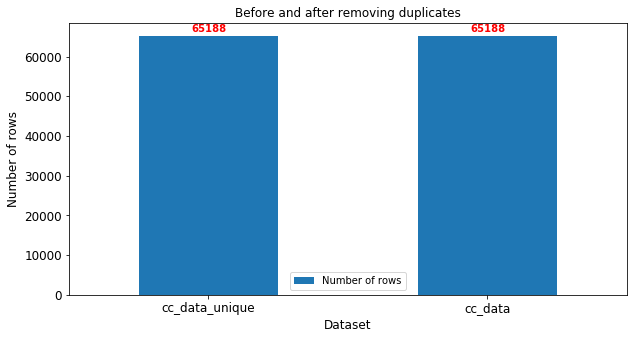

In [0]:
cc_data_unique = cc_data.drop_duplicates(keep='last') # drop duplicates

# make dataframe from cc_data and cc_data_unique
dummy = pd.DataFrame({'Dataset':['cc_data_unique', 'cc_data'], 
                      'Number of rows':[cc_data_unique.shape[0], 
                       cc_data.shape[0]]})

# plot
ax = dummy.plot(kind='bar',
                x="Dataset",
                y="Number of rows",
                title ="Before and after removing duplicates", 
                figsize=(10, 5), 
                fontsize=12)

for i, v in enumerate(dummy['Number of rows']):
  ax.text(i - 0.06, v + 1100, str(v), color='red', fontweight='bold')

ax.set_xticklabels(labels=dummy['Dataset'], rotation=0)

ax.set_xlabel("Dataset", fontsize=12)
ax.set_ylabel("Number of rows", fontsize=12)
plt.show()

=> We can see there is no data duplicates in our dataset because the number of unique rows matches the total number of data that we have.



In [0]:
cc_data_minus_IDs = copy.deepcopy(subset_cc_data)
# Also note that we are removing verbose text features as well because the entry could
# just be slightly different with a colon or comma and still be different so we 
# want to see if numbers all match anywhere in the dataset

# Removing features that are IDs to different laboratory
for feat in ['CLNDISDB', 'SSR', 'CLNDNINCL', 'CLNSIGINCL', 'MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS', 'MOTIF_SCORE_CHANGE']:
  if feat in cc_data_minus_IDs:
    del cc_data_minus_IDs[feat]

#### Sorting features by number of missing data

In [0]:
# Sort features by number of missing data (this will be used to be more clear on the filter bar plot showing missing data)
nan_count_result = cc_data.isnull().sum(axis=0) # count of nans in each feature
sort_output = sorted(list(zip(nan_count_result.keys(), nan_count_result)), key=lambda x: x[1]) # sort features in ascending order of nan count
asc_ordered_features = list(map(list, zip(*sort_output)))[0] # extract the list of feature names
cc_data = cc_data[asc_ordered_features] # reformat data

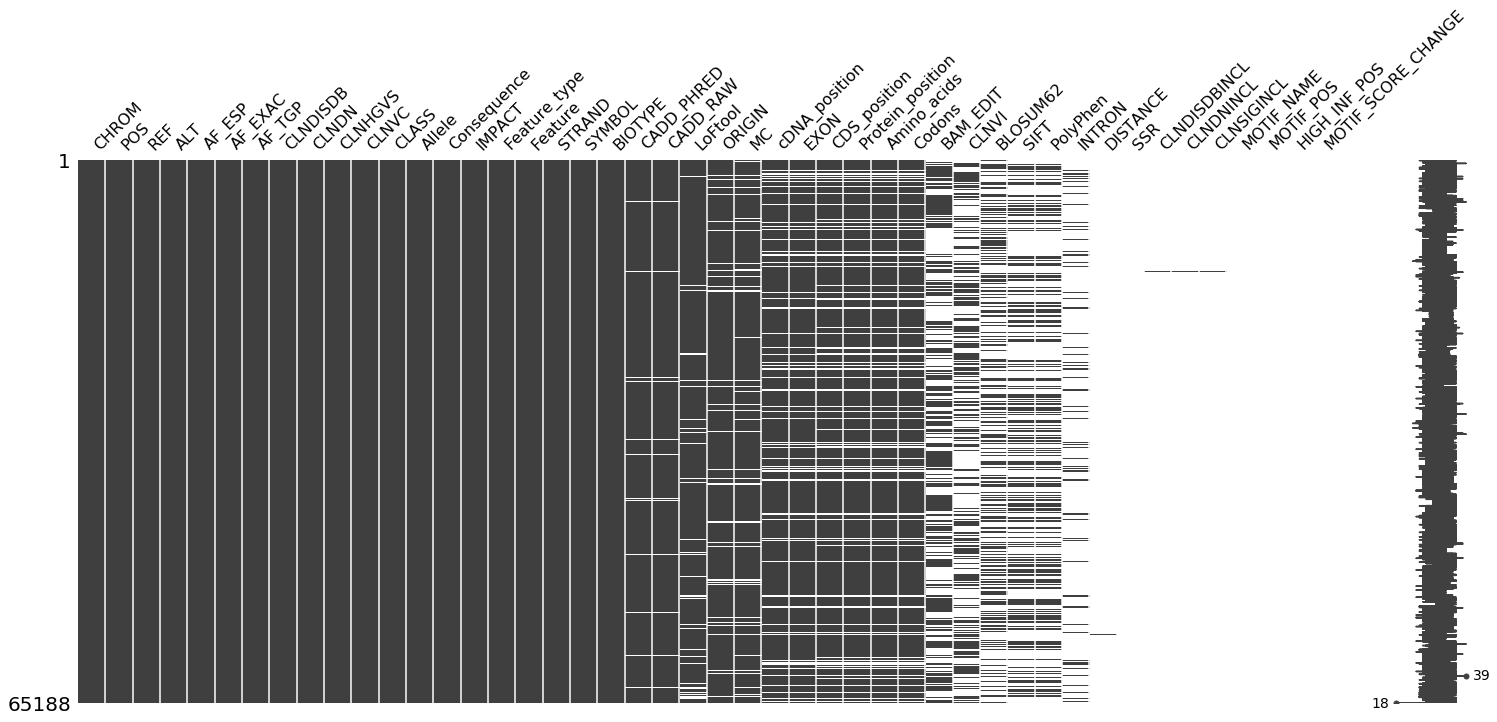

In [0]:
mn.matrix(cc_data)

It is noticeable that a lot of data is missing from this dataset from looking at the Filter Bar plot.  Below we show the features that have no missing data.

In [0]:
# Finding the features that have no missing data 
no_missing_data_features = nan_count_result.keys()[nan_count_result.values == 0]
no_missing_data_features

Index(['CHROM', 'POS', 'REF', 'ALT', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'CLNDISDB',
       'CLNDN', 'CLNHGVS', 'CLNVC', 'CLASS', 'Allele', 'Consequence',
       'IMPACT'],
      dtype='object')

Of the data that we have, the features that appear to have no missing data are: CHROM, POS, REF, ALT, AF_ESP, AF_EXAC, AF_TGP, CLINDISB, CLNDN, CLNHGVS, CLNVC, CLASS, Allele, Consequence, and IMPACT.

Most notable from this list is CLASS which is the labeled classification of the row.  This is important because this means we have all the necessary labels for our prediction task, and we will not have to impute labels which can be an issue.  Imputing classification labels can be an issue because our data is not trivial and we are not experts in the space.  In general this is not a good idea either because the whole validity of the project is based on the ability to classify labels correctly and imputing the labels does not guarantee that they will be correct.

In [0]:
missing_data_features = pd.DataFrame({'Feature':nan_count_result.index[nan_count_result != 0], 'Percentage Known':(65188 - nan_count_result.values[nan_count_result != 0])/65188*100})

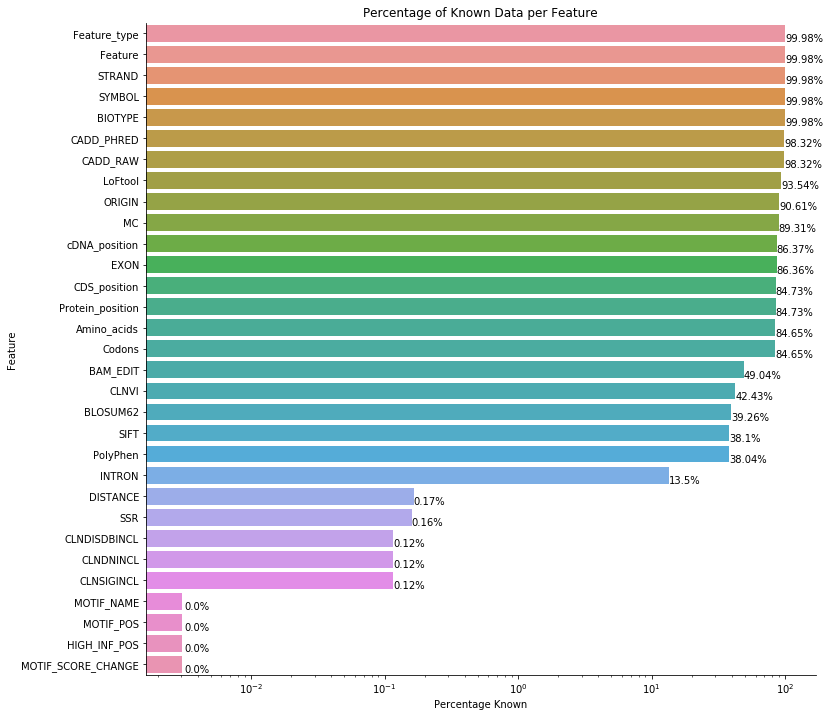

In [0]:
# https://stackoverflow.com/questions/49820549/labeling-horizontal-barplot-with-values-in-seaborn
plt.figure(figsize=(12,12))
plt.title('Percentage of Known Data per Feature')
plt.xscale('log')
ax = sns.barplot(x='Percentage Known', y='Feature', orient='h', data=missing_data_features)
for p in ax.patches:
    _x = p.get_x() + p.get_width() + float(.0001)
    _y = p.get_y() + p.get_height()
    value = str(round(p.get_width(),2)) + '%'
    ax.text(_x, _y, value, ha="left")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

From the horizontal bar graph above, it is clear that several features have a large amount of missing data.  In some cases we have almost 0 percent (some instances with only 2 of the 65,188 possible observations).  Because of this abundance of missing data, we cannot accurately impute data for some of the features.  Notably DISTANCE, SSR, CLNDNINCL, CLNSIGINCL, MOTIF_NAME, MOTIF_POS, HIGH_INF_POS, MOTIF_SCORE_CHANGE.  We will be removing these features all together.  This brings our total feature count down from 46 to 38 features.  As for the other features that have missing data, we will continue to explore the validity in keeping and imputing them as we progress through the report.

In [0]:
# Removing features that aren't useful for our purposes 
for feat in ['DISTANCE', 'SSR', 'CLNDNINCL', 'CLNSIGINCL', 'MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS', 'MOTIF_SCORE_CHANGE']:
  if feat in cc_data:
    del cc_data[feat]

# Data Visualization

In [0]:
cc_data

CHROM     POS REF ALT  AF_ESP  ...  BLOSUM62  SIFT PolyPhen INTRON CLNDISDBINCL
0         1  955563   G   C  0.0000  ...      -2.0   NaN      NaN    NaN          NaN
1         1  955597   G   T  0.0000  ...       NaN   NaN      NaN    NaN          NaN
2         1  955619   G   C  0.0000  ...       1.0   NaN      NaN    NaN          NaN
3         1  957640   C   T  0.0318  ...       NaN   NaN      NaN    NaN          NaN
4         1  976059   C   T  0.0000  ...       NaN   NaN      NaN    NaN          NaN
...     ...     ...  ..  ..     ...  ...       ...   ...      ...    ...          ...
65183    MT   11778   G   A  0.0000  ...       NaN   NaN      NaN    NaN          NaN
65184    MT   12811   T   C  0.0000  ...       NaN   NaN      NaN    NaN          NaN
65185    MT   15470   T   C  0.0000  ...       NaN   NaN      NaN    NaN          NaN
65186    MT   15511   T   C  0.0000  ...       NaN   NaN      NaN    NaN          NaN
65187    MT   15923   A   G  0.0000  ...       NaN   NaN      NaN    NaN          NaN

[65188 rows x 38 columns]

After removing features that simply have almost no data, and therefore cannot impute with good confidence, we want to explore other features that may not have much meaning to the dataset.  We will explore the distributions of data for some of our features.  For example, if a feature holds a boolean value, and that value is true 100% of the time, does it really add any value to the dataset?  Or if the values are true 50% of the time and the remaining 50% are null values, can we really impute when all we know is the value is true and not ever false?  Situations like these do not give valueable information from our data and can be removed as features from our dataset.  Also, we want to explore values that do not make sense.  Although our dataset came well-prepped on first glance, we want to make sure that we do not have any odd values or missing data that instead of a nan or null was labeled as a 'missing.'  We will explore these issues in the following graphics.

First we are going to look at the number of unique values for each of the categorical features that we have remaining.  This is really just so we can plot the values that do not have many unique values and cause clutter on the screen.  This can also show some insight into which features have and don't have a diverse range of values.  

In [0]:
categorical = ['CLNVC','CLNVI', 'Consequence', 'IMPACT', 'SYMBOL', 'Feature_type', 'Feature', 'BIOTYPE', 'STRAND', 'BAM_EDIT', 'SIFT', 'PolyPhen']
len(categorical)

12

In [0]:
unique_cat_values = []
total_non_nans = []
# make df for # unique values in the categorical features
for feat in categorical:
  unique_cat_values.append(cc_data[feat].nunique())
  total_non_nans.append(cc_data[feat].count())
unique_cat_values = pd.DataFrame({'Feature': categorical, 'Num_unique': unique_cat_values})
total_non_nans = pd.DataFrame({'Feature': categorical, 'Non_Nan_Count': total_non_nans})

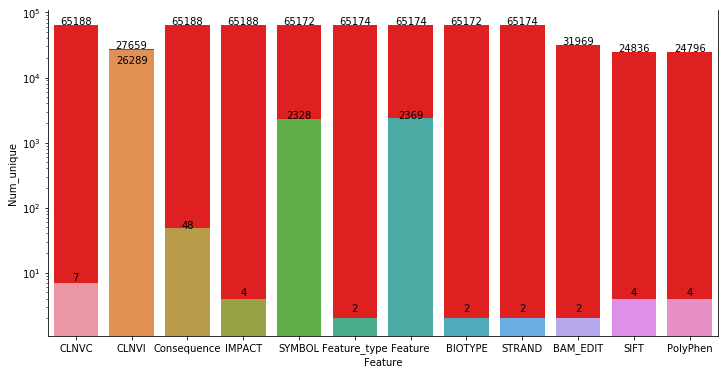

In [0]:
fig = plt.figure(figsize=(12,6))
plt.yscale('log')
sns.barplot(x='Feature', y='Non_Nan_Count', orient='v', data=total_non_nans, color='red')
ax = sns.barplot(x='Feature', y='Num_unique', orient='v', data=unique_cat_values)
for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + float(.5)
    ax.spines['top'].set_visible(False)
    value = int(p.get_height())
    if(int(_y) == 26289):
      ax.text(_x, _y - 10000, value, ha="center")
    else:
      ax.text(_x, _y, value, ha="center")

The graph above shows us the number of unique values for some of the categorical features overlayed on top of the total number of non-nan-entries for the features.  We can see that IMPACT, Feature_type, BIOTYPE, STRAND, BAM_EDIT, SIFT, and PolyPhen all have very few unique values.  Lets further invesigate and see how many times each of these few values occur.  If they are very repetitive, we may consider removing the features from the dataset.

### Question 1: Do we have features that have little information because they have the same value often?

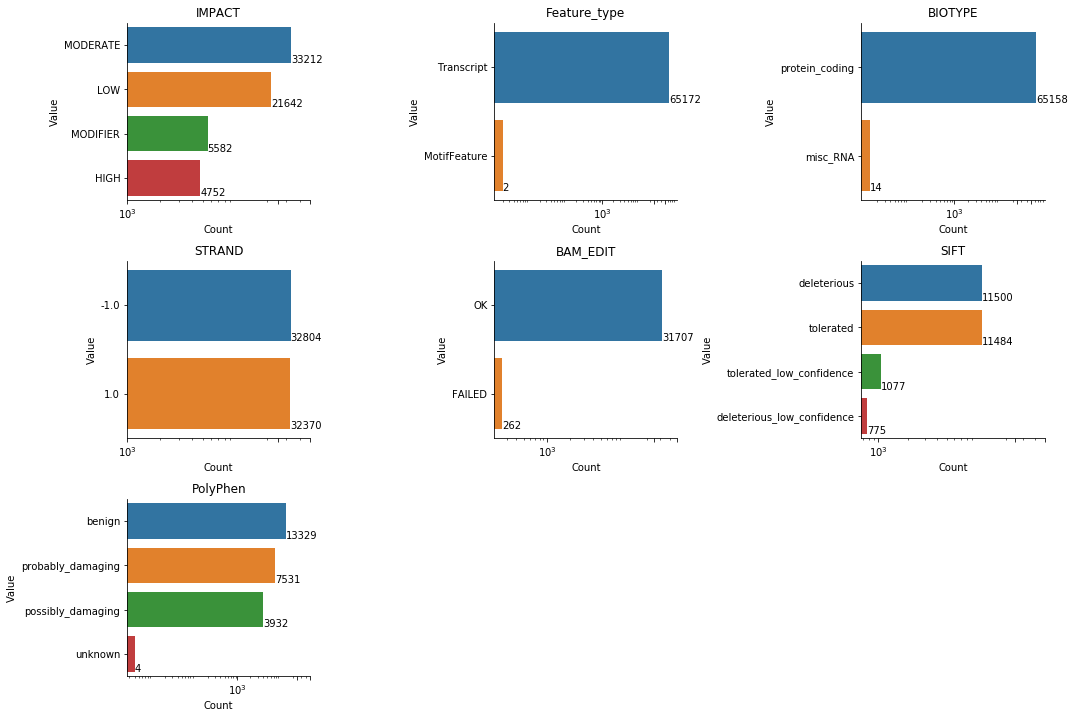

In [0]:
categorical_few = ['IMPACT', 'Feature_type', 'BIOTYPE', 'STRAND', 'BAM_EDIT', 'SIFT', 'PolyPhen']

fig = plt.figure(figsize=(15,10))
# # axs = axs.ravel()
# categorical = ['CLNVC',]
#  Don't want to do this for the ones that are in a range from 0 to 1 (ton of values)...doing this for categorical ones 
graphic = 1
for feat in categorical_few:
  # print(i, feat)
  curr_ax = fig.add_subplot(3,3,graphic)
  df_counts = cc_data[feat].value_counts() 
  df_counts = pd.DataFrame({'Value': df_counts.keys(), 'Count': df_counts.values})
  plt.title(feat)
  ax = sns.barplot(x='Count', y='Value', orient='h', data=df_counts, ax=curr_ax)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  graphic = graphic + 1
  fig.tight_layout(pad=1)
  plt.xscale('log')
  plt.xticks([1000, 25000, 50000])
  
  for p in ax.patches:
    _x = p.get_x() + p.get_width() + float(.001)
    _y = p.get_y() + p.get_height()
    value = int(p.get_width())
    ax.text(_x, _y, value, ha="left")

Wow!  A lot of graphs!  What is shown is  the amount of occurances for each of the unique values for the categorical features we have looked into further.  We wanted to show this so that we can see if there is a reason to keep the feature.  As discussed above, if it has the same value for all occurances, it does not really add any value.  If we have the case that we have the same value when it occurs but a lot of the data is missing, why is it missing?  That brings up issues like missing at random (MAR), missing at completely random (MCAR), and missing not at random (MNAR).  

Some of the notable graphics are for the 'Feature_type', 'BIOTYPE', 'BAM_EDIT', and 'PolyPhen'.  

* Feature_type
  * There is hardly any information on MotifFeature.  In fact, there are only 2 entries for it in the entire dataset while Transcript has over 65,000.  Feature_type for all intents and purposes is the same value across the board, and therefore can be dropped from the dataset. (answer to Q2)

* BIOTYPE
  * Similarly to Feature_type, BIOTYPE only has 2 possible values and misc_RNA only occurs 14 times to protien_coding's 65,000+.  We will also drop this feature (answer to Q2)

* BAM_EDIT
  * BAM_EDIT has similar behavior as the 2 features discussed above with Failed occuring only 242 times to 'OK' 31,000+ times.  (answer to Q2)

* PolyPhen
  * PolyPhen is different than the features mentioned above, but has its own interesting output. The PolyPhen feature as discussed in the first section of this paper refers to the PlyPhen prediction on genetic variants.  Unknown corresponds to VUS or "variants of unknown significance" https://academic.oup.com/nar/article/47/W1/W99/5494761
  

In [0]:
# removing features that are not important to us 
for feat in ['Feature_type', 'BIOTYPE', 'BAM_EDIT']:
  if feat in cc_data:
    del cc_data[feat]


Another thing that we saw in the number of unique value graph for some categorical features is that CLNVI, SYMBOL, Feature, and Consequence had a large amount of unique values.  As a reminder, see the graphic below.

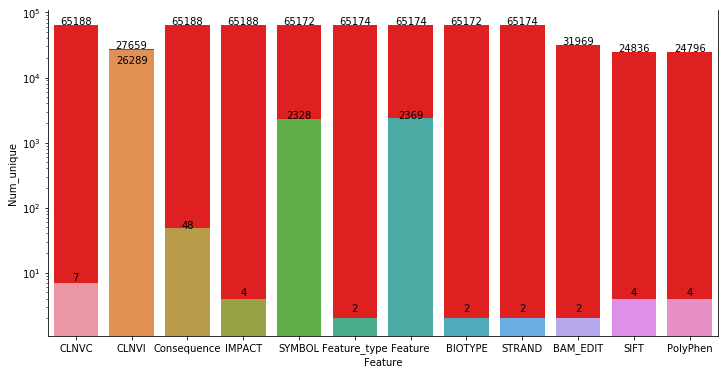

In [0]:
fig = plt.figure(figsize=(12,6))

plt.yscale('log')
sns.barplot(x='Feature', y='Non_Nan_Count', orient='v', data=total_non_nans, color='red')
ax = sns.barplot(x='Feature', y='Num_unique', orient='v', data=unique_cat_values)
for p in ax.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + float(.5)
    ax.spines['top'].set_visible(False)
    value = int(p.get_height())
    if(int(_y) == 26289):
      ax.text(_x, _y - 10000, value, ha="center")
    else:
      ax.text(_x, _y, value, ha="center")


### Question 2: Of the categorical features that we have, are there too many unique values to disern patterns in the data? If so, which features?

see answer below:

Another thing this graph shows us is how many values are non-nan entries. Lets dive into what this could mean for the features with many unique entries.

* CLNVI
  * CLNVI consists of a "tag-value pair" between the "database and variant identifier" (Citation *).  We can see that there is almost a unique entry for each of the entries for CLNVI in the dataset.  Likely there is little change that something that varies so much could help classification.  It is basically different every single time regardless of the classification.  For this reason, we will delete this feature from our data.
  * Also, the data is very text-processing intensive.  For simplicity, this is another reason that we will remove this feature.  

* Consequence
  * Because there are only 48 different values that Consequence has out of 65,000+ entries, we will change the text entries to integers that will represent the data.  This data might be useful in the classification task and we do not want to get rid of it.

* SYMBOL
  * Similarly to consequence, SYMBOL has a lot of unique values, but 2,000/65,000 is still relatively small.  Also, SYMBOL represents the name of the gene, and that could be very important on the prediction task.

* Feature
  * Although similar to the same analysis as SYMBOL, feature does not give as much meaning to the data.  This is where knowing the dataset helps.  Feature is simply a feature's ID and the "consequences are grouped under the feature type they affect" (Citation **).  We have already seen that feature_type has very little impact on the data; therefore, Feature should not either.  It might, but should not affect the classification task.  Since we have many features, we think removing Feature from the dataset will help us simplify while also having a likely low impact.


Citation * : https://www.kaggle.com/kevinarvai/clinvar-conflicting

Citation **: https://useast.ensembl.org/info/docs/tools/vep/vep_formats.html#output



In [0]:
# removing features that are not important to us 
for feat in ['CLNVI', 'Feature']:
  if feat in cc_data:
    del cc_data[feat]

In [0]:
# map strings to numbers
print(len(cc_data.columns))
cc_data.columns

33


Index(['CHROM', 'POS', 'REF', 'ALT', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'CLNDISDB',
       'CLNDN', 'CLNHGVS', 'CLNVC', 'CLASS', 'Allele', 'Consequence', 'IMPACT',
       'STRAND', 'SYMBOL', 'CADD_PHRED', 'CADD_RAW', 'LoFtool', 'ORIGIN', 'MC',
       'cDNA_position', 'EXON', 'CDS_position', 'Protein_position',
       'Amino_acids', 'Codons', 'BLOSUM62', 'SIFT', 'PolyPhen', 'INTRON',
       'CLNDISDBINCL'],
      dtype='object')

In [0]:
cc_data

CHROM     POS REF ALT  AF_ESP  ...  BLOSUM62  SIFT PolyPhen INTRON CLNDISDBINCL
0         1  955563   G   C  0.0000  ...      -2.0   NaN      NaN    NaN          NaN
1         1  955597   G   T  0.0000  ...       NaN   NaN      NaN    NaN          NaN
2         1  955619   G   C  0.0000  ...       1.0   NaN      NaN    NaN          NaN
3         1  957640   C   T  0.0318  ...       NaN   NaN      NaN    NaN          NaN
4         1  976059   C   T  0.0000  ...       NaN   NaN      NaN    NaN          NaN
...     ...     ...  ..  ..     ...  ...       ...   ...      ...    ...          ...
65183    MT   11778   G   A  0.0000  ...       NaN   NaN      NaN    NaN          NaN
65184    MT   12811   T   C  0.0000  ...       NaN   NaN      NaN    NaN          NaN
65185    MT   15470   T   C  0.0000  ...       NaN   NaN      NaN    NaN          NaN
65186    MT   15511   T   C  0.0000  ...       NaN   NaN      NaN    NaN          NaN
65187    MT   15923   A   G  0.0000  ...       NaN   NaN      NaN    NaN          NaN

[65188 rows x 33 columns]

### Subset of the data

In [0]:
# We need to convert EXON to a ratio.  Right now the entries are like 1/10 instead
# of .1 so we need to process that.
subset_cc_data_list = ['ORIGIN', 'IMPACT', 'REF', 'ALT', 'AF_EXAC', 'AF_TGP',
                       'cDNA_position', 'CADD_PHRED', 'EXON', 'CLASS']

subset_cc_data = cc_data[subset_cc_data_list]
print(subset_cc_data.info())
subset_cc_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 10 columns):
ORIGIN           59065 non-null float64
IMPACT           65188 non-null object
REF              65188 non-null object
ALT              65188 non-null object
AF_EXAC          65188 non-null float64
AF_TGP           65188 non-null float64
cDNA_position    56304 non-null object
CADD_PHRED       64096 non-null float64
EXON             56295 non-null object
CLASS            65188 non-null int64
dtypes: float64(4), int64(1), object(5)
memory usage: 5.0+ MB
None


ORIGIN    IMPACT REF ALT  ...  cDNA_position  CADD_PHRED  EXON  CLASS
0         1.0  MODERATE   G   C  ...             61      11.390  1/39      0
1         1.0       LOW   G   T  ...             95       8.150  1/39      0
2         1.0  MODERATE   G   C  ...            117       3.288  1/39      1
3         1.0       LOW   C   T  ...            311      12.560  2/39      0
4         1.0       LOW   C   T  ...            576      17.740  4/39      1
...       ...       ...  ..  ..  ...            ...         ...   ...    ...
65183     1.0  MODIFIER   G   A  ...            NaN      24.400   NaN      0
65184     1.0  MODIFIER   T   C  ...            NaN       3.016   NaN      1
65185     1.0  MODIFIER   T   C  ...            NaN       2.860   NaN      1
65186     1.0  MODIFIER   T   C  ...            NaN       2.081   NaN      1
65187     1.0  MODIFIER   A   G  ...            NaN       9.734   NaN      1

[65188 rows x 10 columns]

### Cleaning Subset Data

As you can see above, we have decided to further explore 11 features including the categorical label "CLASS" for classification.  We chose these features because we wanted to have at least one of each variable type that we discussed in class (nominal, ordinal, interval, ratio) to be represented.  

* Nominal 
  * REF and ALT

* Ordinal
  * ORIGIN and IMPACT

* Interval
  * AF_EXAC, AF_TGP, cDNA_position, and CADD_PHRED

* Ratio
  * EXON

We chose these features in particular because there was a substantial amount of non-nan data, there were not too many unique values, and they are less text-processing intensive like CLNDISDB.  Although we will likely want to use features like CLNDISDB in the future classification task, we may have to resort to word vectors and text processing and we believed that was out-of-scope for the data visualization project.  


The subset of features that we have chose to work with and discuss further are not without their own issues though.  We can see that we have a few datatypes for some of our features as "objects."  We need to discretize this data.  

As discussed earlier, IMPACT has 4 different unique values and is an ordinal variable.  We cannot simply map the 4 values to numbers and impute as if the distance between 1 and 2 is the same as 2 and 3.  Or in our case, say the distance between moderate and low may not be the same distance between moderate and modifier.  Luckily, we are not missing any data for IMPACT.  We have all 65,188 observations :-).  Same story for REF and ALT.  

Another feature that needs to be addressed is the cDNA_position feature.  Currently it is saved as an object, but since it is the "relative position of base pair in cDNA sequence" (Citation *), it should be a numeric value.  The relative position is a distance metric and should be numeric.

Finally the last feature that we have to adjust values for is the EXON feature.  EXON represents the "exon number (out of the total number)" (Citation *) and therefore, is a ratio.  The current format has a string saved instead of the actual ratio.  For this reason, we will parse each observation for EXON and convert it to a ratio.

Another note is that we want to mean-normalize each of the numeric features that we are keeping so that certain distances in the correlation metric aren't heavily skewed towards one feature because the range is from 0-500000 instead of 0 to 1.

Citation * https://www.kaggle.com/kevinarvai/clinvar-conflicting




In [0]:
# ----- Error when running ----- comment these out first

# apply transformations to the subset data:

subset_cc_data.cDNA_position = subset_cc_data.cDNA_position.astype(float)
#if we find non-numerics, replace those with nans
subset_cc_data['cDNA_position'] = subset_cc_data.to_numeric(subset_cc_data['cDNA_position'], errors='coerce')
subset_cc_data.info()

ValueError: ignored

As we can see, we had an issue converting this data because of string values.  Because this occurs infrequently, we will simply take the first number that the data has for simplicity's sake and the rarity makes problems with this less likely.

In [0]:
import re 
import warnings
warnings.filterwarnings('ignore')

# subset_cc_data['cDNA_position_nums'] = subset_cc_data.to_numeric(subset_cc_data['cDNA_position'], errors='coerce')
subset_cc_data['cDNA_position_nums'] = subset_cc_data['cDNA_position'].apply(lambda x: re.findall('\d+', str(x)))
subset_cc_data['cDNA_position_nums'] = subset_cc_data['cDNA_position_nums'].str.get(0)

del subset_cc_data['cDNA_position']
subset_cc_data.rename(columns={'cDNA_position_nums': 'cDNA_position'}, inplace=True)
subset_cc_data.cDNA_position = subset_cc_data.cDNA_position.astype(float)

Now we need to fix the EXON column to hold numeric ratio values 

In [0]:
# Fix EXON
# subset_cc_data.EXON.apply(lambda x: np.nan if x.startswith('XXX') else x)
def make_ratio(x):
  fin = np.nan
  try:
    vals = x.split('/')
    fin = float(vals[0]) / float(vals[-1])
  except:
    return fin 
  return fin
subset_cc_data.EXON = subset_cc_data.EXON.apply(lambda x: make_ratio(x))
# convert EXON to float datatype 
subset_cc_data.EXON = subset_cc_data.EXON.astype(float)

In [0]:
subset_cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 10 columns):
ORIGIN           59065 non-null float64
IMPACT           65188 non-null object
REF              65188 non-null object
ALT              65188 non-null object
AF_EXAC          65188 non-null float64
AF_TGP           65188 non-null float64
CADD_PHRED       64096 non-null float64
EXON             56295 non-null float64
CLASS            65188 non-null int64
cDNA_position    56304 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 5.0+ MB


In [0]:
# Mean normalize all numeric, non-ratio, values.

### Imputation



Write about why we chose KNN for imputation.  IDK, something about simplicity, non-parametric, etc.  Also, the values that we need to impute are all numeric because our subset features that are missing data are all numeric. Note that KNN imputation can work for categorical features as well, but the distance metric would be defined under a different metric such as hamming distance.

We decided to use the KNN algorithm to impute our dataset.  We chose KNN for the following reasons:

* KNN can impute all types of data (ordinal, categorical, etc.) if the distance metric is defined for each type of data.  Although our categorical data is not missing any values, if we added to this dataset or if the dataset was expanded and had missing data once expanded, we could use our same imputation implementation as opposed to changing.  Although sklearn does not seem to support this yet, there are other libraries that are able to do this.

* KNN is non-parametric which means that it does not make assumptions about the underlying data distributions.  This is important because some of our data may not conform to any distribution.

* Already implemented by sklearn :-)

In [0]:
print(subset_cc_data.columns)
columns = list(cc_data.columns)
# columns

Index(['ORIGIN', 'IMPACT', 'REF', 'ALT', 'AF_EXAC', 'AF_TGP', 'CADD_PHRED',
       'EXON', 'CLASS', 'cDNA_position'],
      dtype='object')


In [0]:
numeric_cols = ['ORIGIN', 'AF_EXAC', 'AF_TGP', 'CADD_PHRED', 'EXON', 'CLASS', 'cDNA_position']
len(numeric_cols)

7

In [0]:
# courtesy of https://github.com/eclarson/MachineLearningNotebooks/blob/master/03.%20DataVisualization.ipynb :-)
# changing it to work with our data
# only doing this for some of the numeric features that we have
# can't use this version of knn on non numeric values 
# https://towardsdatascience.com/the-use-of-knn-for-missing-values-cf33d935c637

from sklearn.impute import KNNImputer
import copy

subset_numeric_cols = ['ORIGIN', 'CADD_PHRED', 'EXON', 'cDNA_position'] # numeric cols that are acutally missing data
knn_obj = KNNImputer(n_neighbors=7) # making smaller for memory reasons

temp = subset_cc_data[subset_numeric_cols].to_numpy()

knn_obj.fit(temp)
temp_imputed = knn_obj.transform(temp)

imputed_subset_cc_data = copy.deepcopy(subset_cc_data)
imputed_subset_cc_data[subset_numeric_cols] = temp_imputed
imputed_subset_cc_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 10 columns):
ORIGIN           65188 non-null float64
IMPACT           65188 non-null object
REF              65188 non-null object
ALT              65188 non-null object
AF_EXAC          65188 non-null float64
AF_TGP           65188 non-null float64
CADD_PHRED       65188 non-null float64
EXON             65188 non-null float64
CLASS            65188 non-null int64
cDNA_position    65188 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 5.0+ MB


Need to show that the data looks about the same as it did before (histograms and violin plots!)

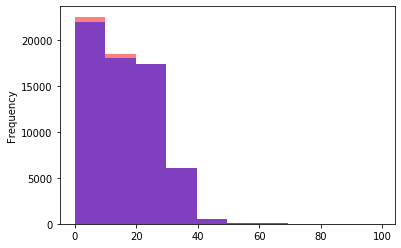

In [0]:
# Example. More plots are below.
imputed_subset_cc_data.CADD_PHRED.plot(kind='hist', alpha=.5, color='red')
cc_data.CADD_PHRED.plot(kind='hist', alpha=.5, color='blue')
plt.show()

As you can see, the distribution of the CADD_PHRED feature has remained largly the same after the imputation process.

# Show all histograms and violin plots then mean normalize


After showing that KNN imputation kept our distributions fairly well, we now need to mean-normalize our data so that features that range from 0-1000 do not affect the correlation between features more than ones that range from 0-1.  We are chosing mean-normalization instead of scaling so that we preserve outliers from the distribution while also incentivizing most data to fall between -1 and 1.

In [0]:
imputed_subset_cc_data

ORIGIN    IMPACT REF ALT  ...  CADD_PHRED      EXON  CLASS  cDNA_position
0         1.0  MODERATE   G   C  ...      11.390  0.025641      0      61.000000
1         1.0       LOW   G   T  ...       8.150  0.025641      0      95.000000
2         1.0  MODERATE   G   C  ...       3.288  0.025641      1     117.000000
3         1.0       LOW   C   T  ...      12.560  0.051282      0     311.000000
4         1.0       LOW   C   T  ...      17.740  0.102564      1     576.000000
...       ...       ...  ..  ..  ...         ...       ...    ...            ...
65183     1.0  MODIFIER   G   A  ...      24.400  0.503968      0    2634.142857
65184     1.0  MODIFIER   T   C  ...       3.016  0.411967      1    3120.142857
65185     1.0  MODIFIER   T   C  ...       2.860  0.425661      1    1065.000000
65186     1.0  MODIFIER   T   C  ...       2.081  0.548594      1    2952.714286
65187     1.0  MODIFIER   A   G  ...       9.734  0.416119      1    3250.428571

[65188 rows x 10 columns]

## Violin Plots
Types and examples of Violin plots: https://mode.com/blog/violin-plot-examples

#### Grouping Data

In [0]:
#Grouping data by class (conflict vs. non-conflict)
imputed_subset_cc_data_grouped = imputed_subset_cc_data.groupby(by='CLASS')

for val,grp in imputed_subset_cc_data_grouped:
    print('There are',len(grp),'records in',val,'class.')

There are 48754 records in 0 class.
There are 16434 records in 1 class.


### Question 3:  Is our dataset well balanced?

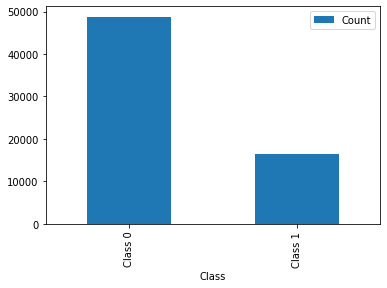

In [0]:
df_balanced = pd.DataFrame({'Class': ['Class 0', 'Class 1'], 'Count': [imputed_subset_cc_data['CLASS'].value_counts()[0], imputed_subset_cc_data['CLASS'].value_counts()[1]]})
df_balanced.plot.bar(x='Class', y='Count')


As you can see, our dataset is not all that balanced meaning that we don't have a close number of observations for each classification task.  This could impact how well our classifier could work.  This is because the data is heavily leaning towards class 0, or no disagreement between doctors.  This can cause our classifier to be dominated by the class 0 and not be well balanced.  We need to take this into account when we are building our classifier because we want our classifier to learn the difference between the 2 classes, not learn 1.

### Basic violin plot


#### Plots of AF_EXAC | AF_TGP | CADD_PHRED | EXON    

In [0]:
import seaborn as sns
sns.set(style="whitegrid")

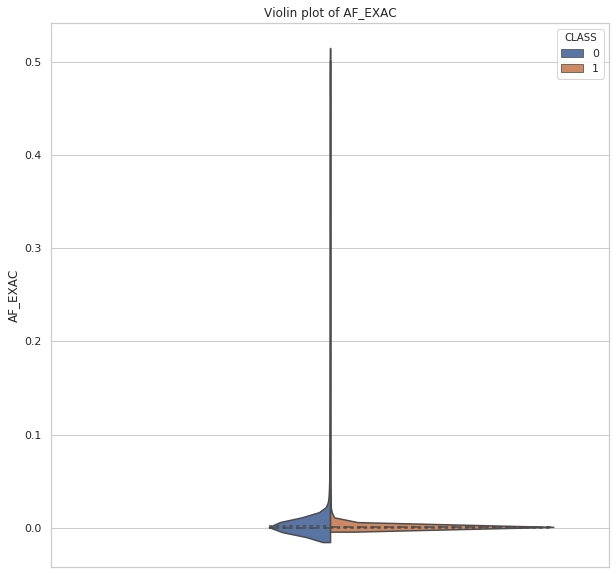

In [0]:
imputed_subset_cc_data["all"] = ""
plt.figure(figsize=(10, 10))
ax = sns.violinplot(x = "all", y="AF_EXAC", hue="CLASS", data=imputed_subset_cc_data, 
                    split=True, inner="quart")
plt.title('Violin plot of AF_EXAC')

ax.set_xlabel("")
plt.show()


In the plot above, we can see that the spread of class 1 is much smaller than the spread of class 0.  This could indicate that AF_EXAC could help our classification problem because class 0 is more likely to have a AF_EXAC that is further from 0.



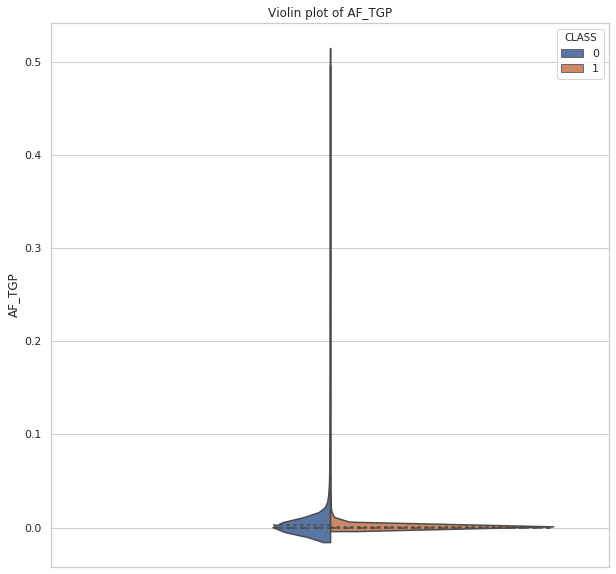

In [0]:
# sns boxplot
imputed_subset_cc_data["all"] = ""
plt.figure(figsize=(10, 10))
ax = sns.violinplot(x = "all", y="AF_TGP", hue="CLASS", data=imputed_subset_cc_data, 
                    split=True, inner="quart")
ax.set_xlabel("")

plt.title('Violin plot of AF_TGP')

plt.show()

Again, we can see that the spread of one class is much smaller than the spread of the other. This could indicate that AF_TGP could help our classification problem because class 0 is more likely to have a AF_TGP that is further from 0.



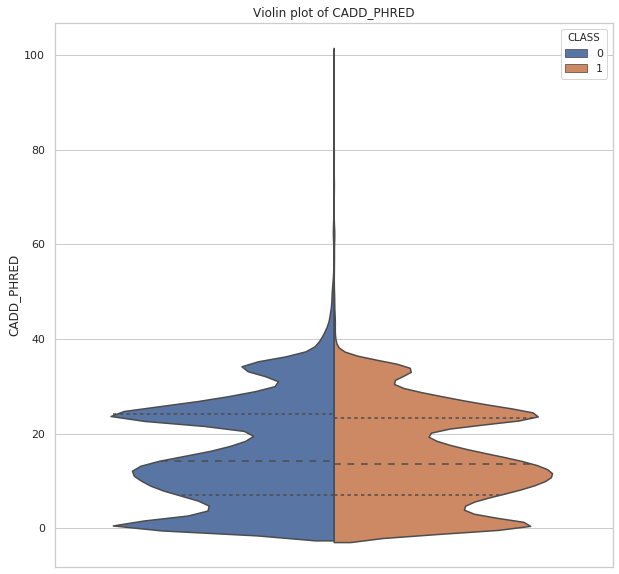

In [0]:
# sns boxplot
imputed_subset_cc_data["all"] = ""
plt.figure(figsize=(10, 10))
ax = sns.violinplot(x = "all", y="CADD_PHRED", hue="CLASS", data=imputed_subset_cc_data, 
                    split=True, inner="quart")
ax.set_xlabel("")

plt.title('Violin plot of CADD_PHRED')

plt.show()

Here we can see that both classes have several peaks, so a box plot would not be suitable here.  We can also see that both classes have peaks around the same values so CADD_PHRED may not tell us much.

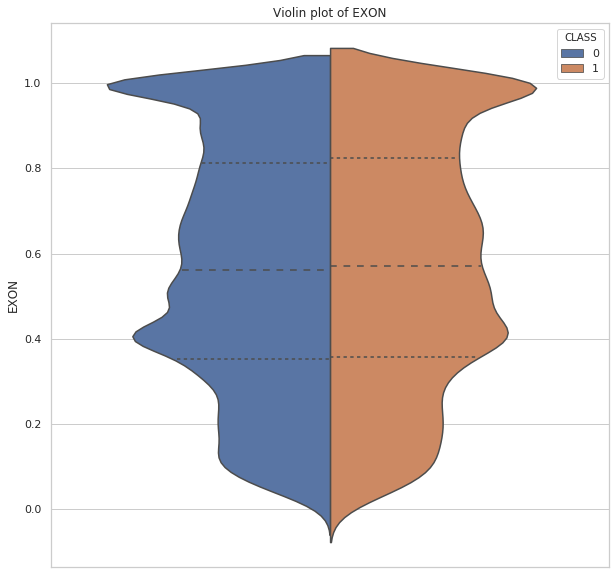

In [0]:
# sns boxplot
imputed_subset_cc_data["all"] = ""
plt.figure(figsize=(10, 10))
ax = sns.violinplot(x = "all", y="EXON", hue="CLASS", data=imputed_subset_cc_data, 
                    split=True, inner="quart")
ax.set_xlabel("")

plt.title('Violin plot of EXON')

plt.show()

Again, we see that both classes have peaks at similar values so the EXON ratio might not be as telling to the classification task on its own.  However, its interaction with other variables might be important.

## Histagram and Kernel Density         





### Histagrams of non-imputed and imputed data

In [0]:
# Good link: https://www.datacamp.com/community/tutorials/seaborn-python-tutorial

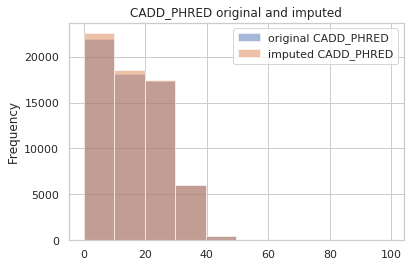

In [0]:
# subset_numeric_cols = ['ORIGIN', 'CADD_PHRED', 'EXON', 'cDNA_position'] 
# numeric cols that are acutally missing data

# CADD_PHRED
plt.title('CADD_PHRED original and imputed')
subset_cc_data['CADD_PHRED'].plot(kind='hist', alpha=0.5)
imputed_subset_cc_data['CADD_PHRED'].plot(kind='hist', alpha=0.5)
plt.legend(["original CADD_PHRED", "imputed CADD_PHRED"])
plt.show()

# Gaussian => boxplot possible | Not-Gaussian => boxplot impossible

Here we can see that the distribution of data for the CADD_PHRED feature has remained approximately the same after imputation.  Go KNN!

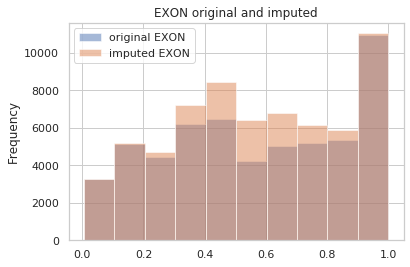

In [0]:
# EXON
plt.title('EXON original and imputed')
subset_cc_data['EXON'].plot(kind='hist', alpha=0.5)
imputed_subset_cc_data['EXON'].plot(kind='hist', alpha=0.5)
plt.legend(["original EXON", "imputed EXON"])
plt.show()

Although EXON looks a little more varied than the CADD_PHRED imputation, EXON had more data to impute.  Also, the structure of the histograms still shows that EXON was imputated in a way that preserved the original distribution.

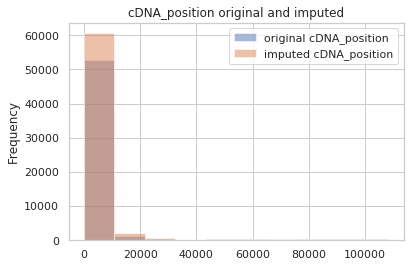

In [0]:
# cDNA_position
plt.title('cDNA_position original and imputed')
subset_cc_data['cDNA_position'].plot(kind='hist', alpha=.5)
imputed_subset_cc_data['cDNA_position'].plot(kind='hist', alpha=.5)
plt.legend(["original cDNA_position", "imputed cDNA_position"])
plt.show()

Again, we can see that the distribution of cDNA_position has remained largely the same after imputation.  This indicates that the KNN found the most similar neighbors for the missing features in the lowest bin.

### Plots of AF_EXAC | AF_TGP | CADD_PHRED | EXON    

AF_EXAC Histogram and Kernel Density


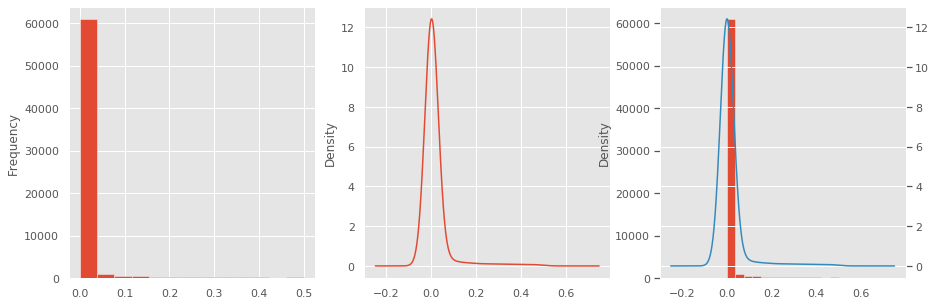

In [0]:
# IMPACT Histogram and Kernel Density ---- Turn this into numeric values?

# REF ---- Turn this into numeric values?

# ALT ---- Turn this into numeric values?

# AF_EXAC 
print('AF_EXAC Histogram and Kernel Density')
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
imputed_subset_cc_data['AF_EXAC'].plot.hist(bins=13)

plt.subplot(1,3,2)
imputed_subset_cc_data['AF_EXAC'].plot.kde(bw_method=.5)

plt.subplot(1,3,3)
imputed_subset_cc_data['AF_EXAC'].plot.hist(bins=13)
imputed_subset_cc_data['AF_EXAC'].plot.kde(bw_method=.5, secondary_y=True)

plt.show()


We can see a very Gaussian distribution for AF_EXAC which is very similar to the histogram.  We can see that there was a relatively small spread with most values being close to 0.

More than 90% of people with 0 AF_EXAC

AF_TGP Histogram and Kernel Density


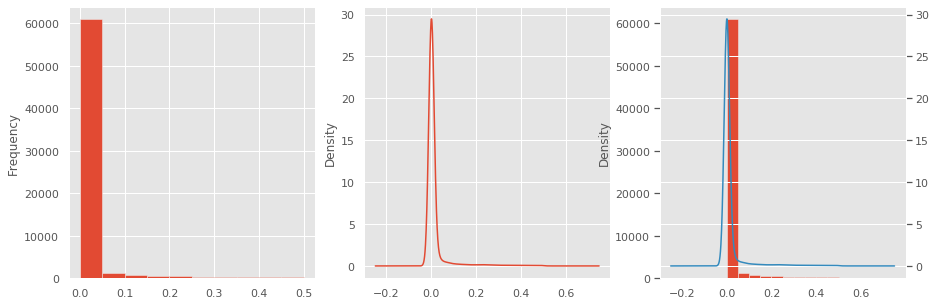

In [0]:
# AF_TGP
print('AF_TGP Histogram and Kernel Density')
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
imputed_subset_cc_data['AF_TGP'].plot.hist(bins=10)

plt.subplot(1,3,2)
imputed_subset_cc_data['AF_TGP'].plot.kde(bw_method=0.2)

plt.subplot(1,3,3)
imputed_subset_cc_data['AF_TGP'].plot.hist(bins=10)
imputed_subset_cc_data['AF_TGP'].plot.kde(bw_method=0.2, secondary_y=True)

plt.show()

Again, AF_TGP has a very Gaussian distribution similar to AF_EXAC with most values being close to 0 with a small spread.







CADD_PHRED Histogram and Kernel Density


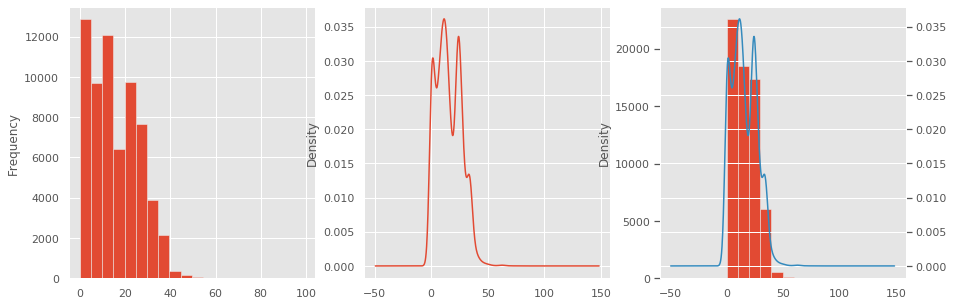

In [0]:
# CADD_PHRED Histogram and Kernel Density
print('CADD_PHRED Histogram and Kernel Density')
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
imputed_subset_cc_data['CADD_PHRED'].plot.hist(bins=20)

plt.subplot(1,3,2)
imputed_subset_cc_data['CADD_PHRED'].plot.kde(bw_method=0.2)

plt.subplot(1,3,3)
imputed_subset_cc_data['CADD_PHRED'].plot.hist(bins=10)
imputed_subset_cc_data['CADD_PHRED'].plot.kde(bw_method=0.2, secondary_y=True)

plt.show()

I like this plot, looks nice.  There are many peaks within this data so we know that an interquartile range plot would not be helpful because it is not a Gaussian distribution. 

EXON Histogram and Kernel Density


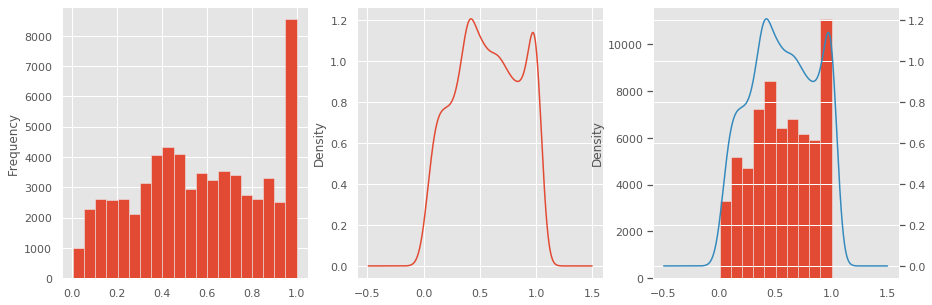

In [0]:
# EXON hist
print('EXON Histogram and Kernel Density')
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
imputed_subset_cc_data['EXON'].plot.hist(bins=20)

plt.subplot(1,3,2)
imputed_subset_cc_data['EXON'].plot.kde(bw_method=0.2)

plt.subplot(1,3,3)
imputed_subset_cc_data['EXON'].plot.hist(bins=10)
imputed_subset_cc_data['EXON'].plot.kde(bw_method=0.2, secondary_y=True)

plt.show()


Like CADD_PHRED, we see a very not Gaussian distribution for EXON so a box plot would not be a good representation of EXON.

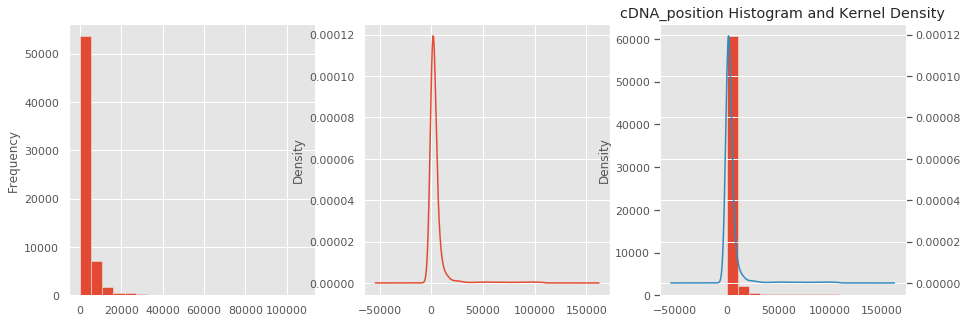

In [0]:
# cDNA_position
plt.style.use('ggplot')

fig = plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
imputed_subset_cc_data['cDNA_position'].plot.hist(bins=20)

plt.subplot(1,3,2)
imputed_subset_cc_data['cDNA_position'].plot.kde(bw_method=0.2)

plt.subplot(1,3,3)
imputed_subset_cc_data['cDNA_position'].plot.hist(bins=10)
imputed_subset_cc_data['cDNA_position'].plot.kde(bw_method=0.2, secondary_y=True)
plt.title('cDNA_position Histogram and Kernel Density')

plt.show()

We can see that cDNA_position has a large peak around 0 with a small spread.  Most values falling very close to 0.

## Normalization

In [0]:
# mean normalize 
column_names_to_normalize = ['AF_EXAC', 'AF_TGP', 'CADD_PHRED', 'cDNA_position']

for col in column_names_to_normalize:
  imputed_subset_cc_data[col] = (imputed_subset_cc_data[col] - imputed_subset_cc_data[col].mean()) / (imputed_subset_cc_data[col].std())

imputed_subset_cc_data

ORIGIN    IMPACT REF ALT  ...  CADD_PHRED      EXON  CLASS  cDNA_position
0         1.0  MODERATE   G   C  ...   -0.388663  0.025641      0      -0.402888
1         1.0       LOW   G   T  ...   -0.688879  0.025641      0      -0.400144
2         1.0  MODERATE   G   C  ...   -1.139389  0.025641      1      -0.398368
3         1.0       LOW   C   T  ...   -0.280252  0.051282      0      -0.382710
4         1.0       LOW   C   T  ...    0.199724  0.102564      1      -0.361321
...       ...       ...  ..  ..  ...         ...       ...    ...            ...
65183     1.0  MODIFIER   G   A  ...    0.816834  0.503968      0      -0.195204
65184     1.0  MODIFIER   T   C  ...   -1.164592  0.411967      1      -0.155978
65185     1.0  MODIFIER   T   C  ...   -1.179047  0.425661      1      -0.321853
65186     1.0  MODIFIER   T   C  ...   -1.251228  0.548594      1      -0.169491
65187     1.0  MODIFIER   A   G  ...   -0.542107  0.416119      1      -0.145462

[65188 rows x 10 columns]

We wanted to normalize our data so that we could visualize the correlation of numeric features properly.  Without normalization, features that have a large range, say 0-100, would have more impact than features that range from 0-1.  We chose mean normalization so that we can preserve outliers, but make most values fall between -1 and 1.

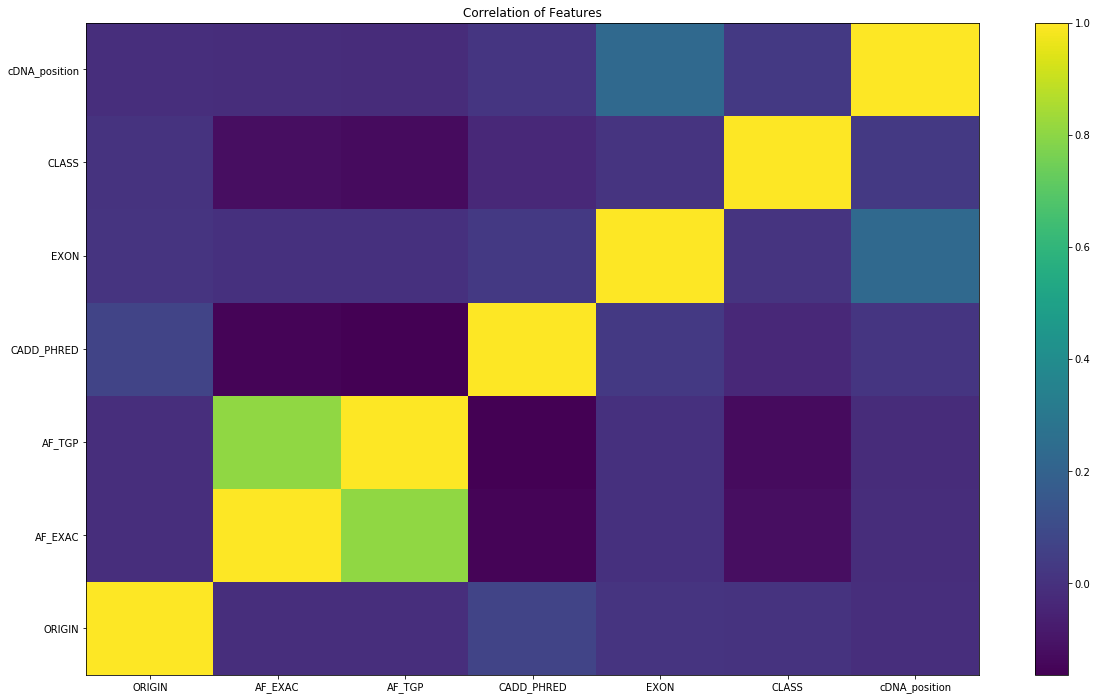

In [0]:
# This needs to be done after we impute and only for numeric values
test_corr_df = imputed_subset_cc_data[['ORIGIN', 'AF_EXAC', 'AF_TGP', 'CADD_PHRED',
       'EXON', 'CLASS', 'cDNA_position']]
plt.figure(figsize=(20,12))
plt.title('Correlation of Features')
plt.pcolor(test_corr_df.corr())
plt.yticks(np.arange(0.5, len(test_corr_df.keys()), 1), test_corr_df.keys())
plt.xticks(np.arange(0.5, len(test_corr_df.keys()), 1), test_corr_df.keys())
plt.colorbar()
plt.show()

Here we can see that most features do not correlate with each other at a high value.  But there are a few exceptions:

* AF_EXAC and AF_TGP
  * Both of these feature have a very strong correlation with one another.  This could mean that there is not really a lot one feature is telling more than the other.  This could be an indicator that we can use dimensionality reduction on these two features.  This is a little to be expected because both of these measure the AF (allele frequency) values coming from 2 different sources (EXAC with the Exome Aggregation Consortium) so the values should largely be the same.

* cDNA_position and EXON
  * This is an interesting correlation although somewhat small correlation.  cDNA_position is the relative position of the base pair while EXON is "any part of a gene that will encode a part of the final mature RNA produced by that gene" (citation *).  The EXON number tells us the number out of the total number of genes.  Not sure exactly what this correlation could tell us, but maybe the postion of the alleles in the cDNA_position have some relationship with the EXON number.

citation * : https://en.wikipedia.org/wiki/Exon


In [0]:
# Good link: https://www.datacamp.com/community/tutorials/seaborn-python-tutorial

# Exceptional Work

## What is UMAP?

UMAP, or uniform manifold approximation and projection, is a diminsionality reduction technique.  It utilizes a graph structure that preserves local and global structure. Essentially, the terms in the cross-entropy function that makes a directed graph that serves two purposes: (need to talk about manifolds more)

1.   Get the data points that are close together 
2.   Get the distance between data points 

These two things lets local and global structure be maintained in lower dimensional space.  This is an advantage over t-SNE because t-SNE only preserves local structure.  UMAP tries to find a manifold which is something that can represent non-linear behavior.  A manifold is a somewhat nice looking space that has similar to Euclidean distances which basically lets UMAP represent the high dimensional space into a lower space that preserves the structure of the original space.  

https://www.youtube.com/watch?v=nq6iPZVUxZU


In [0]:
import umap

In [0]:
imputed_subset_cc_data

ORIGIN    IMPACT REF ALT  ...      EXON  CLASS  cDNA_position  all
0         1.0  MODERATE   G   C  ...  0.025641      0      61.000000     
1         1.0       LOW   G   T  ...  0.025641      0      95.000000     
2         1.0  MODERATE   G   C  ...  0.025641      1     117.000000     
3         1.0       LOW   C   T  ...  0.051282      0     311.000000     
4         1.0       LOW   C   T  ...  0.102564      1     576.000000     
...       ...       ...  ..  ..  ...       ...    ...            ...  ...
65183     1.0  MODIFIER   G   A  ...  0.503968      0    2634.142857     
65184     1.0  MODIFIER   T   C  ...  0.411967      1    3120.142857     
65185     1.0  MODIFIER   T   C  ...  0.425661      1    1065.000000     
65186     1.0  MODIFIER   T   C  ...  0.548594      1    2952.714286     
65187     1.0  MODIFIER   A   G  ...  0.416119      1    3250.428571     

[65188 rows x 11 columns]

In [0]:
imputed_subset_cc_data.columns

Index(['ORIGIN', 'IMPACT', 'REF', 'ALT', 'AF_EXAC', 'AF_TGP', 'CADD_PHRED',
       'EXON', 'CLASS', 'cDNA_position', 'all'],
      dtype='object')

In [0]:
# using test_corr_df for testing 

# change class to target
imputed_subset_cc_data.rename(columns={'CLASS': 'target'}, inplace=True)

# Leaving out non-discretized data (impact, ref, alt)
X = imputed_subset_cc_data[['ORIGIN', 'AF_EXAC', 'AF_TGP', 'CADD_PHRED',
       'EXON', 'cDNA_position']]
Y = imputed_subset_cc_data.target

# convert to ndarrays
X = X.to_numpy()
Y = Y.to_numpy()

print(X.shape)
print(Y.shape)

(65188, 6)
(65188,)


In [0]:
umap_reduction = umap.UMAP()
embed = umap_reduction.fit_transform(X) # put dataframe in as an ndarray
# https://pypi.org/project/umap-learn/  for ndarray example
# https://umap-learn.readthedocs.io/en/latest/basic_usage.html   for plotting/embedding

embed.shape

(65188, 2)

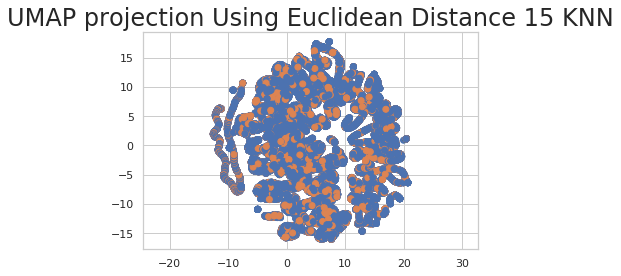

In [0]:
plt.scatter(embed[:, 0], embed[:, 1], c=[sns.color_palette()[x] for x in Y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection Using Euclidean Distance 15 KNN', fontsize=24);

In [0]:
umap_reduction = umap.UMAP(n_neighbors=30)
embed = umap_reduction.fit_transform(X) # put dataframe in as an ndarray
# https://pypi.org/project/umap-learn/  for ndarray example
# https://umap-learn.readthedocs.io/en/latest/basic_usage.html   for plotting/embedding

embed.shape

(65188, 2)

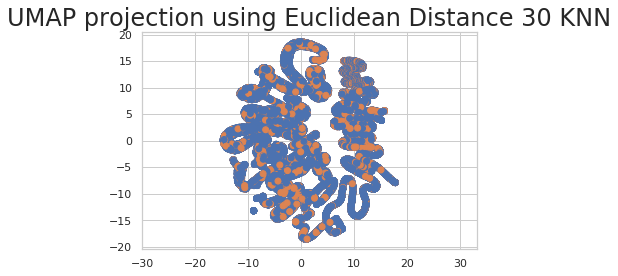

In [0]:
plt.scatter(embed[:, 0], embed[:, 1], c=[sns.color_palette()[x] for x in Y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection using Euclidean Distance 30 KNN', fontsize=24);

In [0]:
umap_reduction = umap.UMAP(n_neighbors=15, metric='minkowski')
embed = umap_reduction.fit_transform(X) # put dataframe in as an ndarray
# https://pypi.org/project/umap-learn/  for ndarray example
# https://umap-learn.readthedocs.io/en/latest/basic_usage.html   for plotting/embedding

embed.shape

(65188, 2)

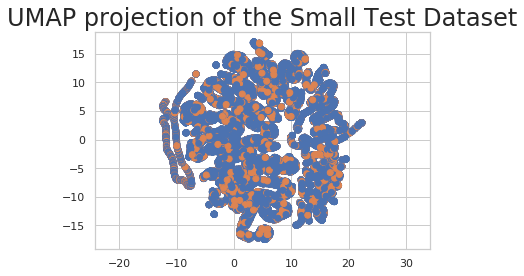

In [0]:
plt.scatter(embed[:, 0], embed[:, 1], c=[sns.color_palette()[x] for x in Y])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Small Test Dataset', fontsize=24);

In [0]:
# 3d euclidean
umap_reduction = umap.UMAP(n_neighbors=15, n_components=3)
embed = umap_reduction.fit_transform(X) # put dataframe in as an ndarray
# https://pypi.org/project/umap-learn/  for ndarray example
# https://umap-learn.readthedocs.io/en/latest/basic_usage.html   for plotting/embedding

embed.shape


(65188, 3)

In [0]:
import plotly.express as px

# make umap dataframe
df_umap = pd.DataFrame({'x': embed[:,0], 'y': embed[:,1], 'z': embed[:,2], 'label': Y})
fig = px.scatter_3d(df_umap, x='x', y='y', z='z', color='label')
fig.show()

https://drive.google.com/open?id=1qOk0dQapDMwzvnOKtNQFn_7Vszc5PB0V

For 3d image.  Would not embed 3d image 

Our interpretations of the graphics:

Of the features that we decided to use, dimensionality reduction did not seem to help.  Dimensionality reduction is extremely powerful, and helpful if features are heavily correlated.  If the features are correlated, then they are redundant and we can project to a lower dimensional space because that data holds very little information that another feature does not already have.  Unfortunately for us, UMAP did not seem to find a manifold to perform dimensionality reduction on.  We varied several different parameters, like number of KNN and the distance metric, but we found that the plots, although different, have no clear separation between class 0 and class 1.  We do not see distinct clustering, in fact, we see a lot of overlap between the 2 classes after dimensionality reduction.  This indicates that our features are not redundant regarding the classification task.  Since we cannot see any distinctions between the target classes, that may also indicate that the features we chose to further analyze are not related to our target classifications.  If that is truly the case, these features may not help us in the classification problem and may have no use to us.  UMAP is a nonlinear dimensionality reduction technique, so we can't just claim that our features interact in a nonlinear way and UMAP can't capture it.  So what else could it mean?  UMAP makes assumptions that "the data is uniformly distributed on a locally connected Riemannian manifold and that the Riemannian metric is locally constant or approximately locally constant" (Citation *).  The graphs could also indicate that our data violates one of these assumptions and the UMAP dimensionality reduction technique is unable to perform accurately on our dataset.

OR

UMAP cannot reduce our features down to a 2 or 3 dimensional space.  There may simply not be a manifold that UMAP can use to reduce the dimensionality down this small; however, higher dimensions like 4 or 5 might work but they cannot be easily visualized.  Also, our data may not be easily distinguished between classes.  As we saw in several of our violin plots, the differences between class 0 and class 1 were very small.  This may mean that it is simply not easy to project our data into a smaller dimensionality because the difference between classes in high dimensionality is also small.  

Citation * : https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction